In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor




import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("insurance (1).csv")
data

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830
1334,18,female,31.920,OB1,0,no,northeast,2205.98080
1335,18,female,36.850,OB2,0,no,southeast,1629.83350
1336,21,female,25.800,PREO,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#deleting duplicates
print('Size of dataframe before drop_duplicates', data.shape)

data.drop_duplicates(inplace= True)

print('Size of dataframe after drop_duplicates', data.shape)

Size of dataframe before drop_duplicates (1338, 8)
Size of dataframe after drop_duplicates (1337, 8)


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data['classif'].unique()

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', nan, 'UW'], dtype=object)

In [8]:
data['classif'].mode()

0    OB1
dtype: object

In [9]:
data['classif']=data['classif'].fillna('OB1')

In [10]:
data.age.max()

190

In [11]:
data.age.min()

-58

In [12]:
ind = data[data.age.isin([0,-1,-58,190])].index
data.drop(ind,inplace=True)
data.shape

(1332, 8)

In [13]:
#Seprating out the categorical and continuous variables
def seperate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique () < 100:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=seperate_data_types(data)

from tabulate import tabulate

Lable=[categorical, continuous]

print(tabulate({"Categorical":categorical,"continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  ------------
age            bmi
sex            charges
classif
children
smoker
region


# Outlier Treatment

In [14]:
def myOutliers(data,col):
    Q3=np.quantile(data[col],0.75)
    Q1=np.quantile(data[col],0.25)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    
    print("The lower range of",col,"is",lower_range)
    print("The upper range of",col,"is",upper_range)
    
    mylist=[x for x in data[col] if ((x<lower_range) | (x>upper_range))]
    print("total outlier in",col,"are",len(mylist))
    my_outlier_df=data.loc[data[col].isin(mylist)]
k=['age','bmi','children','charges']

In [15]:
for i in k:
    print('i is',i)
    myOutliers(data,i)
    print('*****************')

i is age
The lower range of age is -9.0
The upper range of age is 87.0
total outlier in age are 0
*****************
i is bmi
The lower range of bmi is 13.721874999999995
The upper range of bmi is 47.28687500000001
total outlier in bmi are 8
*****************
i is children
The lower range of children is -3.0
The upper range of children is 5.0
total outlier in children are 0
*****************
i is charges
The lower range of charges is -13045.6413425
The upper range of charges is 34394.269037499995
total outlier in charges are 141
*****************


# EDA

### Univariate Analysis

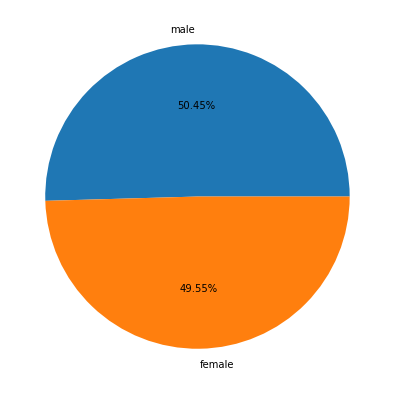

In [16]:
fig, ax=plt.subplots(figsize = (15, 7)) 
percentage=data["sex"].value_counts() 
labels =list(data["sex"].value_counts ().index)
plt.pie (percentage,labels=labels, autopct="%0.2f%%")
plt.show()

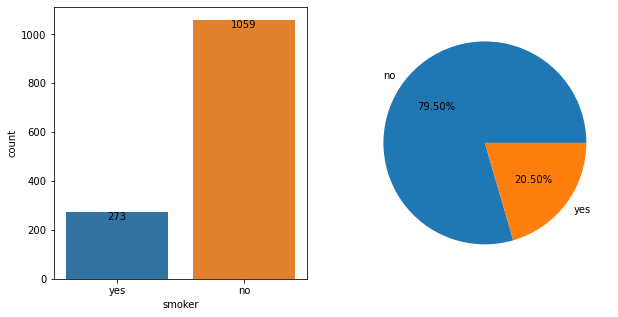

In [17]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5)) 

percentage=data["smoker"].value_counts() 
labels =list(data["smoker"].value_counts().index)  

sns.countplot (x=data["smoker"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 

for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

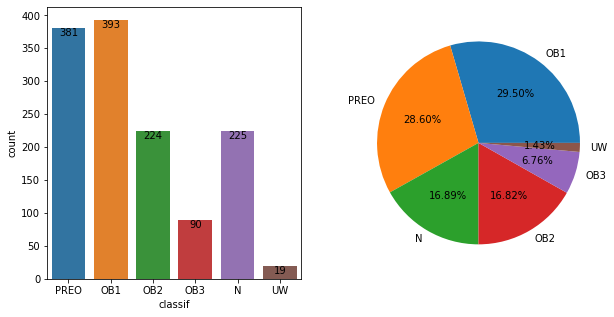

In [18]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))

percentage=data["classif"].value_counts() 
labels =list(data["classif"].value_counts().index)  

sns.countplot (x=data["classif"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 

for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

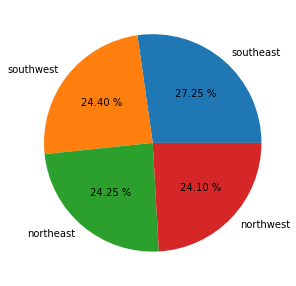

In [19]:
fig, ax = plt.subplots(figsize = (12,5))


percentage = data['region'].value_counts()
labels = list(data['region'].value_counts().index)


plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

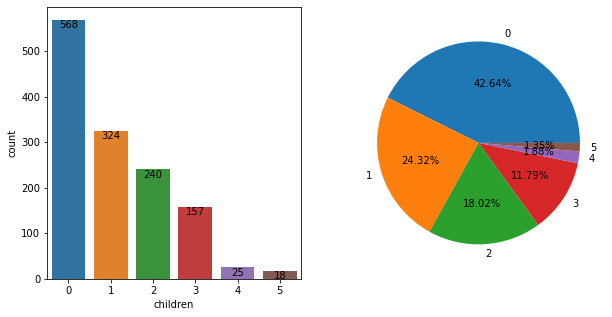

In [20]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5)) 
percentage=data["children"].value_counts() 
labels =list(data["children"].value_counts().index)  
sns.countplot (x=data["children"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 
for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

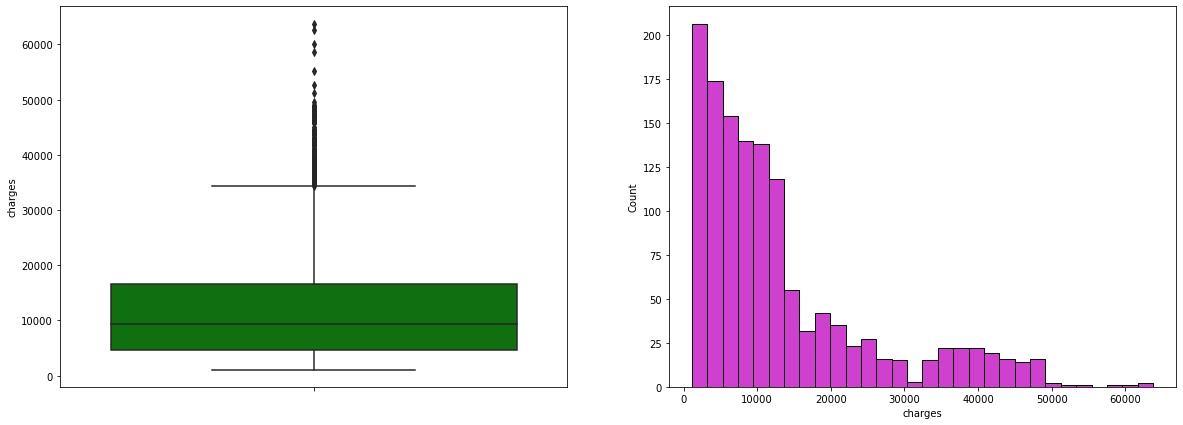

In [21]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=data["charges"],ax=ax[1],color='m')
sns.boxplot(y=data['charges'],ax=ax[0],color='g')
plt.show()

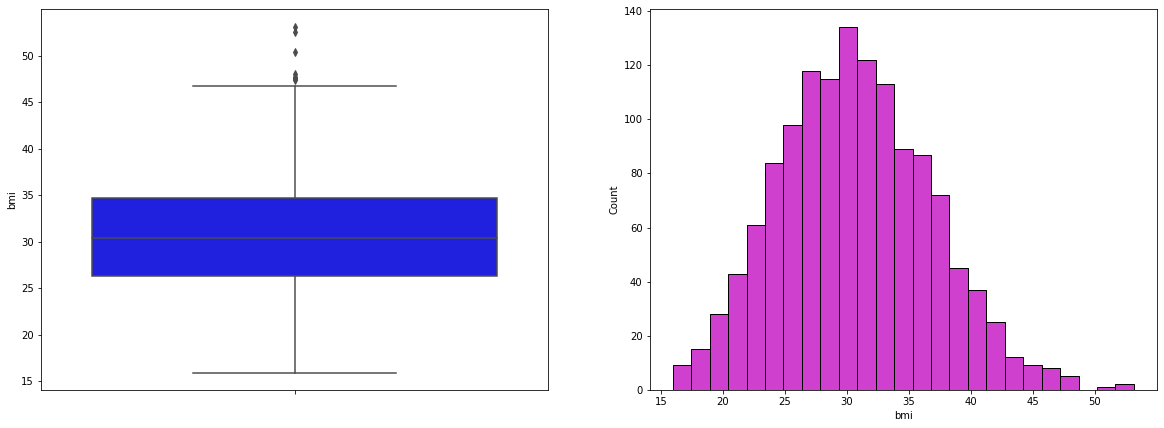

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=data["bmi"],ax=ax[1],color='m')
sns.boxplot(y=data['bmi'],ax=ax[0],color='b')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

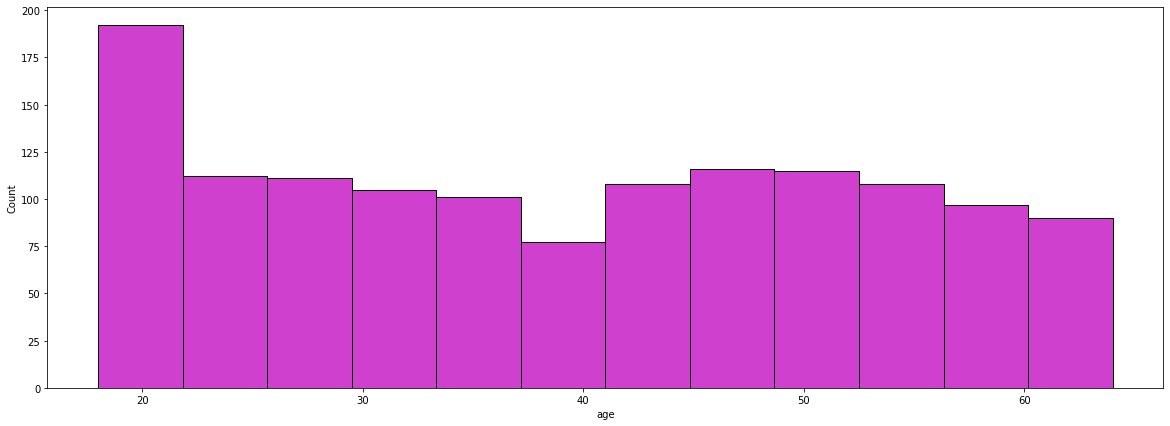

In [23]:
fig,ax=plt.subplots(figsize=(20,7))
sns.histplot(x=data["age"],color='m')

#### interpretaion 1: around 60 % popluation  having BMI between 25-35 which means they falls under the category of pre-obesity and obesity 1 type
#### interpretation 2:around 42 %  population have no children and 24 % have 1 child.
#### interpretaton 3: Region nearly equal

### Bivariate

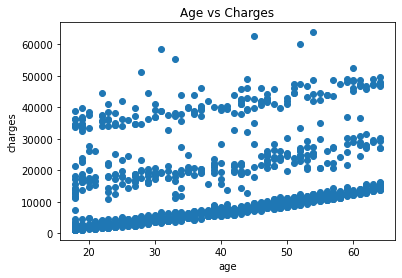

In [24]:
plt.scatter(data['age'],data['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')
plt.show()

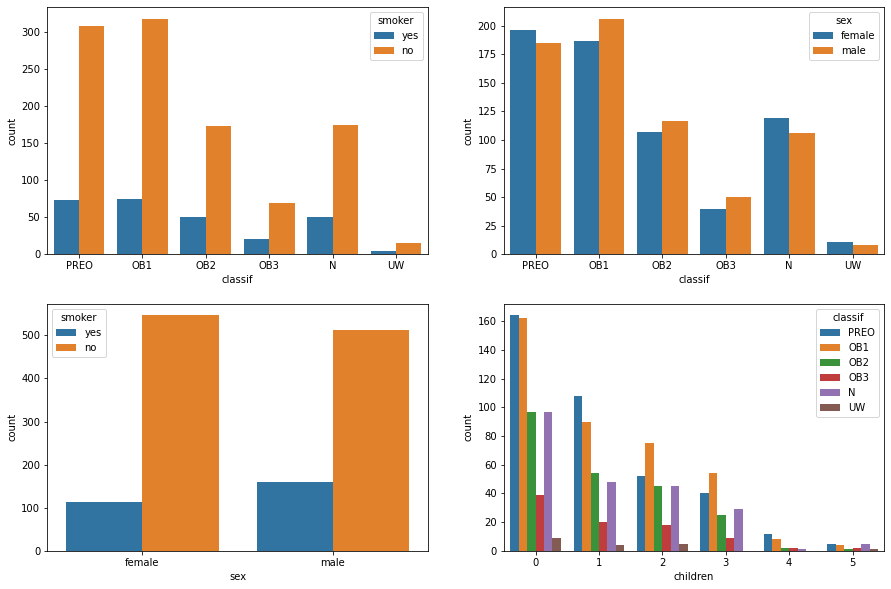

In [25]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x='classif',hue='smoker',data=data,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='classif',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='sex',hue='smoker',data=data,ax=ax[1,0])
ax[1,0].set_title('')
sns.countplot(x='children',hue='classif',data=data,ax=ax[1,1])
ax[1,1].set_title('')
plt.show()  

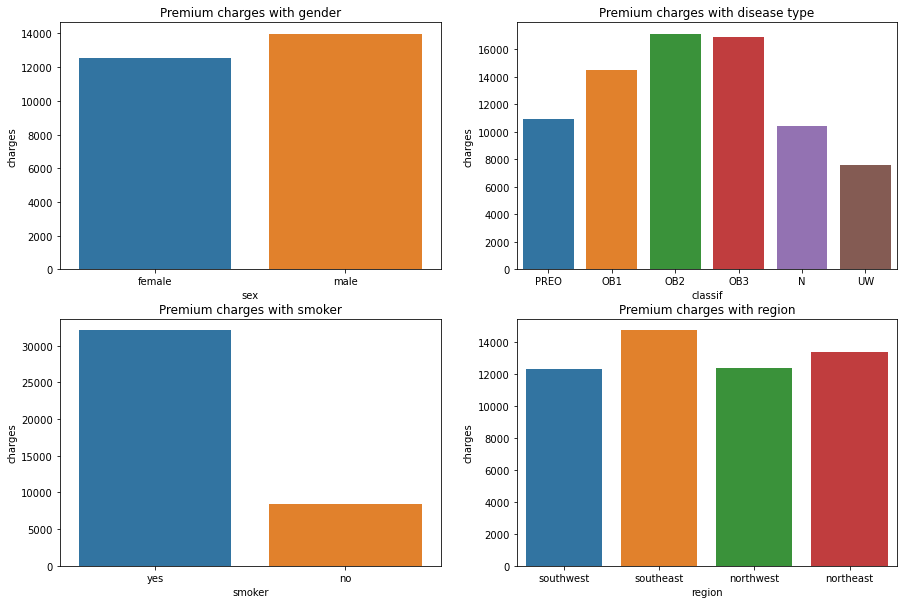

In [26]:
fig,ax = plt.subplots( 2,2,figsize=(15,10))
ax[0,0].set_title('Premium charges with gender')
ax[0,1].set_title('Premium charges with disease type')
ax[1,0].set_title('Premium charges with smoker')
ax[1,1].set_title('Premium charges with region')

sns.barplot(y=data['charges'], x=data['sex'],ci=None,ax=ax[0,0])
sns.barplot(y=data['charges'], x=data['classif'],ci=None,ax=ax[0,1])
sns.barplot(y=data['charges'], x=data['smoker'],ci=None,ax=ax[1,0])
sns.barplot(y=data['charges'], x=data['region'],ci=None,ax=ax[1,1])
plt.show()

Text(0.5, 1.0, 'Bmi vs Charges')

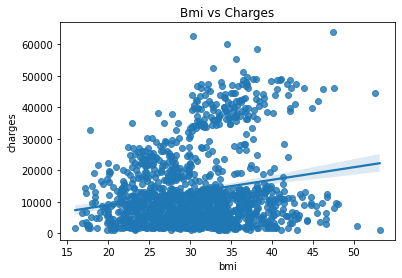

In [27]:
sns.regplot(data['bmi'],data['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Bmi vs Charges')

## Multivariate

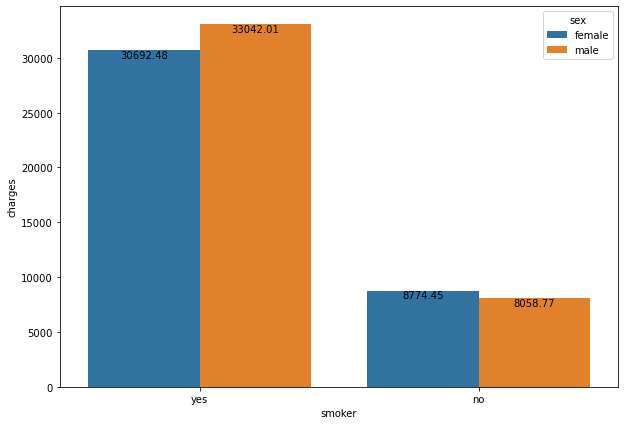

In [28]:
fig,ax= plt.subplots(figsize=(10,7))

sns.barplot(x=data['smoker'],y=data['charges'],hue=data['sex'],ci=None,ax=ax)
count=len(data['smoker'])

for bar in ax.patches:
    count = f"{round((bar.get_height()), 2)}"
    x = bar.get_x() +bar.get_width() /2
    y=bar.get_height()
    ax.annotate (count, (x, y), ha = "center", va = "top")
plt.show()

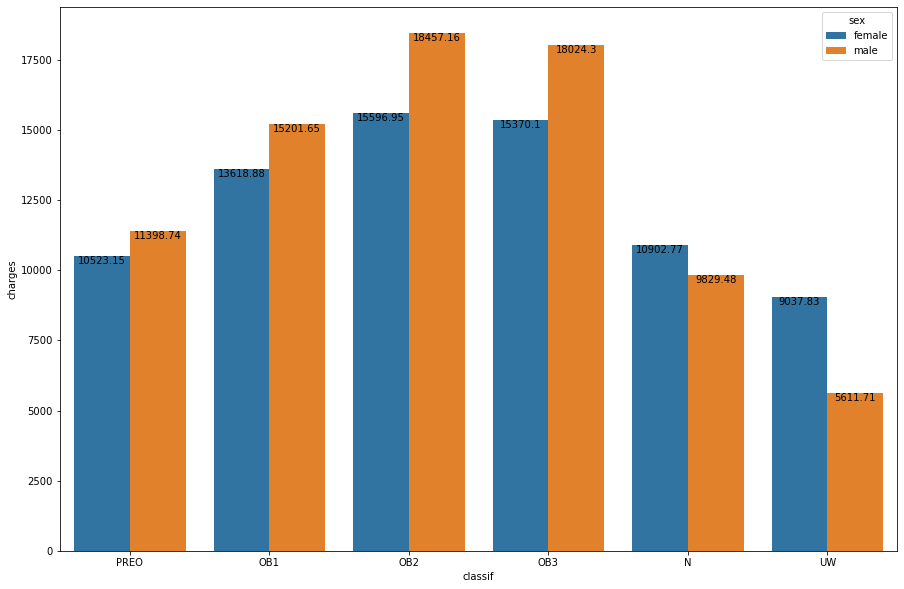

In [29]:
fig,ax= plt.subplots(figsize=(15,10))

sns.barplot(x=data['classif'],y=data['charges'],hue=data['sex'],ci=None,ax=ax)
count=len(data['classif'])

for bar in ax.patches:
    count = f"{round((bar.get_height()), 2)}"
    x = bar.get_x() +bar.get_width() /2
    y=bar.get_height()
    ax.annotate (count, (x, y), ha = "center", va = "top")
plt.show()

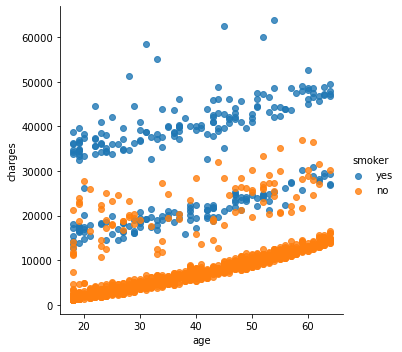

In [30]:
sns.lmplot("age", "charges", data, hue="smoker", fit_reg=False);

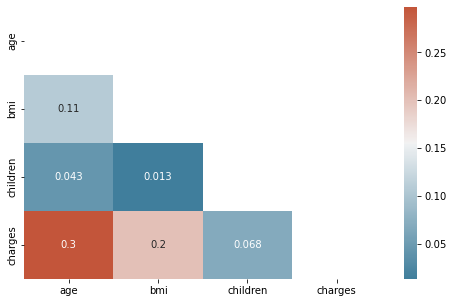

In [31]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,annot = True)
plt.show()

In [32]:
new_df=data

In [33]:
retain_encoder = preprocessing.LabelEncoder()

retain_encoder.fit(new_df.sex)
print(retain_encoder.classes_)
new_df.sex = retain_encoder.transform(new_df.sex)

retain_encoder.fit(new_df.smoker)
print(retain_encoder.classes_)
new_df.smoker = retain_encoder.transform(new_df.smoker)

retain_encoder.fit(new_df.region)
print(retain_encoder.classes_)
new_df.region = retain_encoder.transform(new_df.region)

new_df

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.90,PREO,0,1,3,16884.9240
1,18,1,33.77,OB1,1,0,2,1725.5523
2,28,1,33.00,OB1,3,0,2,4449.4620
4,32,1,28.88,PREO,0,0,1,3866.8552
5,31,0,25.74,PREO,0,0,2,3756.6216
...,...,...,...,...,...,...,...,...
1332,52,0,44.70,OB3,3,0,3,11411.6850
1333,50,1,30.97,OB1,3,0,1,10600.5483
1334,18,0,31.92,OB1,0,0,0,2205.9808
1335,18,0,36.85,OB2,0,0,2,1629.8335


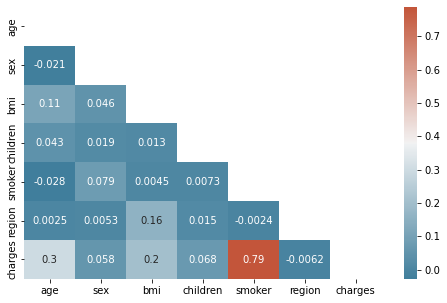

In [34]:
corr = new_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,annot = True)
plt.show()

In [35]:
df=data

In [36]:
df = pd.get_dummies(df, columns=['sex','smoker','classif'])
df

,age,bmi,children,region,charges,sex_0,sex_1,smoker_0,smoker_1,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,19,27.90,0,3,16884.9240,1,0,0,1,0,0,0,0,1,0
1,18,33.77,1,2,1725.5523,0,1,1,0,0,1,0,0,0,0
2,28,33.00,3,2,4449.4620,0,1,1,0,0,1,0,0,0,0
4,32,28.88,0,1,3866.8552,0,1,1,0,0,0,0,0,1,0
5,31,25.74,0,2,3756.6216,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.70,3,3,11411.6850,1,0,1,0,0,0,0,1,0,0
1333,50,30.97,3,1,10600.5483,0,1,1,0,0,1,0,0,0,0
1334,18,31.92,0,0,2205.9808,1,0,1,0,0,1,0,0,0,0
1335,18,36.85,0,2,1629.8335,1,0,1,0,0,0,1,0,0,0


In [37]:
#df['charges']=np.log(df['charges'])

In [38]:
#df

In [39]:
df.drop(['region','children'], axis='columns', inplace=True)

In [40]:
df

,age,bmi,charges,sex_0,sex_1,smoker_0,smoker_1,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,19,27.90,16884.9240,1,0,0,1,0,0,0,0,1,0
1,18,33.77,1725.5523,0,1,1,0,0,1,0,0,0,0
2,28,33.00,4449.4620,0,1,1,0,0,1,0,0,0,0
4,32,28.88,3866.8552,0,1,1,0,0,0,0,0,1,0
5,31,25.74,3756.6216,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.70,11411.6850,1,0,1,0,0,0,0,1,0,0
1333,50,30.97,10600.5483,0,1,1,0,0,1,0,0,0,0
1334,18,31.92,2205.9808,1,0,1,0,0,1,0,0,0,0
1335,18,36.85,1629.8335,1,0,1,0,0,0,1,0,0,0


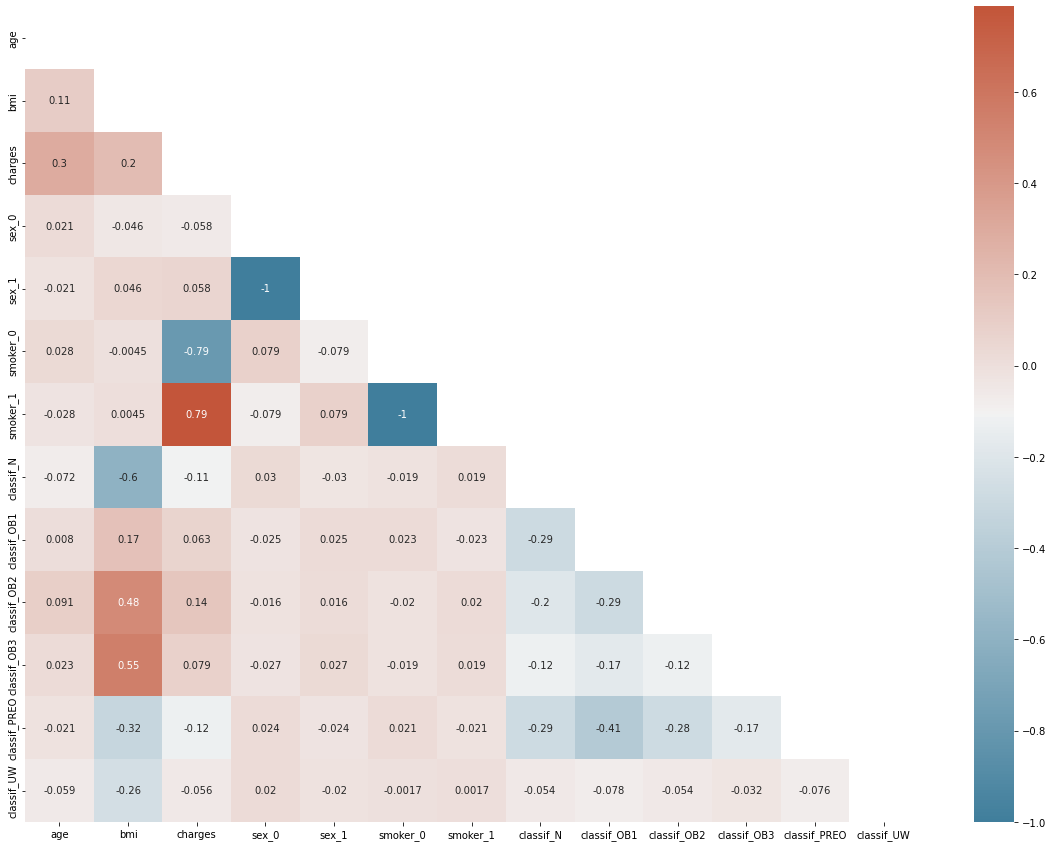

In [41]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,annot = True)
plt.show()

### Scaling the data

In [42]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ["age","bmi",'charges']

df[scale_columns] = std_scaler.fit_transform(df[scale_columns])

df.head()


,age,bmi,charges,sex_0,sex_1,smoker_0,smoker_1,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,-1.440423,-0.453907,0.298277,1,0,0,1,0,0,0,0,1,0
1,-1.511740,0.511098,-0.953077,0,1,1,0,0,1,0,0,0,0
2,-0.798569,0.384513,-0.728228,0,1,1,0,0,1,0,0,0,0
4,-0.513301,-0.292799,-0.776320,0,1,1,0,0,0,0,0,1,0
5,-0.584618,-0.809003,-0.785420,1,0,1,0,0,0,0,0,1,0


### Model making independent and dependent

In [43]:
X=df.drop('charges', axis=1)
Y=df['charges']

### splitting the data into training and testing

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y, test_size=0.25, random_state=42)
print("X_train1={},X_test1={},y_train1={},y_test1={}".format(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape))

X_train1=(999, 12),X_test1=(333, 12),y_train1=(999,),y_test1=(333,)


### Linear Regression

In [45]:
MODEL = []
R_SQUARE = []
MSE_VALUES  = []
CROSS_VAL_SCORE = []

In [46]:
model=LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression()

In [47]:
results, names= list(), list()

In [48]:
y_test_predicted = model.predict(X_test1)

print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))
print('R-square of the test data : ',model.score(X_test1,y_test1))

MSE of the test data : 0.26356176614002974
R-square of the test data :  0.6864286550620156


In [49]:
MODEL.append('LinearRegression')
R_SQUARE.append(model.score(X_test1,y_test1))
MSE_VALUES.append(mean_squared_error(y_test_predicted,y_test1))

In [50]:
df = pd.DataFrame({'Actual' : y_test1, 'Predicted' : y_test_predicted})

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

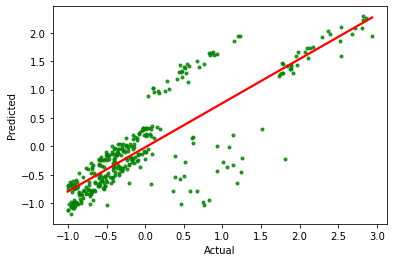

In [51]:
sns.regplot(x = df.Actual, y = df.Predicted, marker = '.', color = 'green', line_kws = {'color' : 'red'},ci = None)

### cross-validation method

from sklearn.model_selection import KFold
cv=KFold(n_splits=10)

model_1=LinearRegression()
model_1.fit(X_train1,y_train1)
y_test_predicted1 = model_1.predict(X_test1)

n_scores=cross_val_score(model_1, X_train1,y_train1,scoring='r2',cv=None,n_jobs=1,error_score='raise')
n_scores1 = cross_val_score(model_1, X_train1, y_train1,scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')


print('R-Score: %.3f' % (np.mean(n_scores)))
#print('MSE of the test data :',mean_squared_error(y_test_predicted1,y_test1))
print("MSE Score: %.3f" % (np.mean(n_scores1)*-1))

MODEL.append('Cross Validation')
R_SQUARE.append(np.mean(n_scores))
MSE_VALUES.append(np.mean(n_scores1)*-1)

### RandomForestRegressor

### RandomForestRegressor

In [52]:
from sklearn.metrics import r2_score

model3=RandomForestRegressor()


cv=KFold(n_splits=5)
n_scores=cross_val_score(model3, X_train1,y_train1,scoring='r2',cv=cv,n_jobs=-1,error_score='raise')
n_scores1 = cross_val_score(model3, X_train1, y_train1,scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
model3=RandomForestRegressor()
model3.fit(X_train1,y_train1)
y_pred=model3.predict(X_test1)
y_pred




print('R-Score: %.3f' % (np.mean(n_scores)))
print("MSE Score: %.3f" % (np.mean(n_scores1)*-1))

R-Score: 0.833
MSE Score: 0.174


In [53]:
print(y_pred)

[ 2.85664870e+00 -4.90773296e-01 -5.99493258e-01 -6.45132727e-01
 -3.95885745e-01 -8.38169674e-01 -1.59564288e-01 -2.74059109e-01
 -5.86504320e-01 -5.52095368e-01 -4.20372582e-01 -8.31281824e-02
 -6.83107974e-01  8.83659705e-02 -9.17816402e-01  6.14512629e-01
 -8.03881021e-01 -9.34361262e-01  7.59073252e-02 -9.25280303e-01
 -8.81683487e-01  2.15755803e+00 -5.42787924e-01 -8.95471353e-02
 -7.66299774e-01  1.03004461e+00 -2.08612743e-01  1.32765598e-01
 -4.15492747e-01 -4.49686735e-01 -8.29495041e-01 -3.42807553e-01
 -7.37293599e-01  4.37345625e-01 -2.52945093e-01  9.24786746e-02
  5.59382337e-01  2.56390545e+00 -4.17479525e-01 -2.82090157e-03
 -4.48810847e-01 -9.58182426e-01  1.77596654e+00  5.58633355e-01
  2.45992401e+00 -3.95194103e-01 -9.21128079e-01 -6.04337634e-01
  3.26386126e-01 -1.43540533e-01 -5.79689727e-01 -9.37988304e-01
  8.14842489e-01  2.60611125e+00  8.31456333e-02 -5.77652905e-01
  7.67490149e-02 -1.26068201e-01 -2.04427766e-01 -9.39337415e-01
 -6.60683621e-01 -9.05508

In [54]:
MODEL.append('RandomForestRegressor')
R_SQUARE.append(np.mean(n_scores))
MSE_VALUES.append(np.mean(n_scores1)*-1)
CROSS_VAL_SCORE.append(np.mean(n_scores))

### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5, max_leaf_nodes=10)

dtm.fit(X_test1,y_test1)
print("R-Squared on test data = {}".format(dtm.score(X_test1,y_test1)))

y_test_predicted = dtm.predict(X_test1)

print("R-Squared on train dataset={}".format(dtm.score(X_train1,y_train1)))
print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))

R-Squared on test data = 0.8294452476556965
R-Squared on train dataset=0.852863213860755
MSE of the test data : 0.1433540164849253


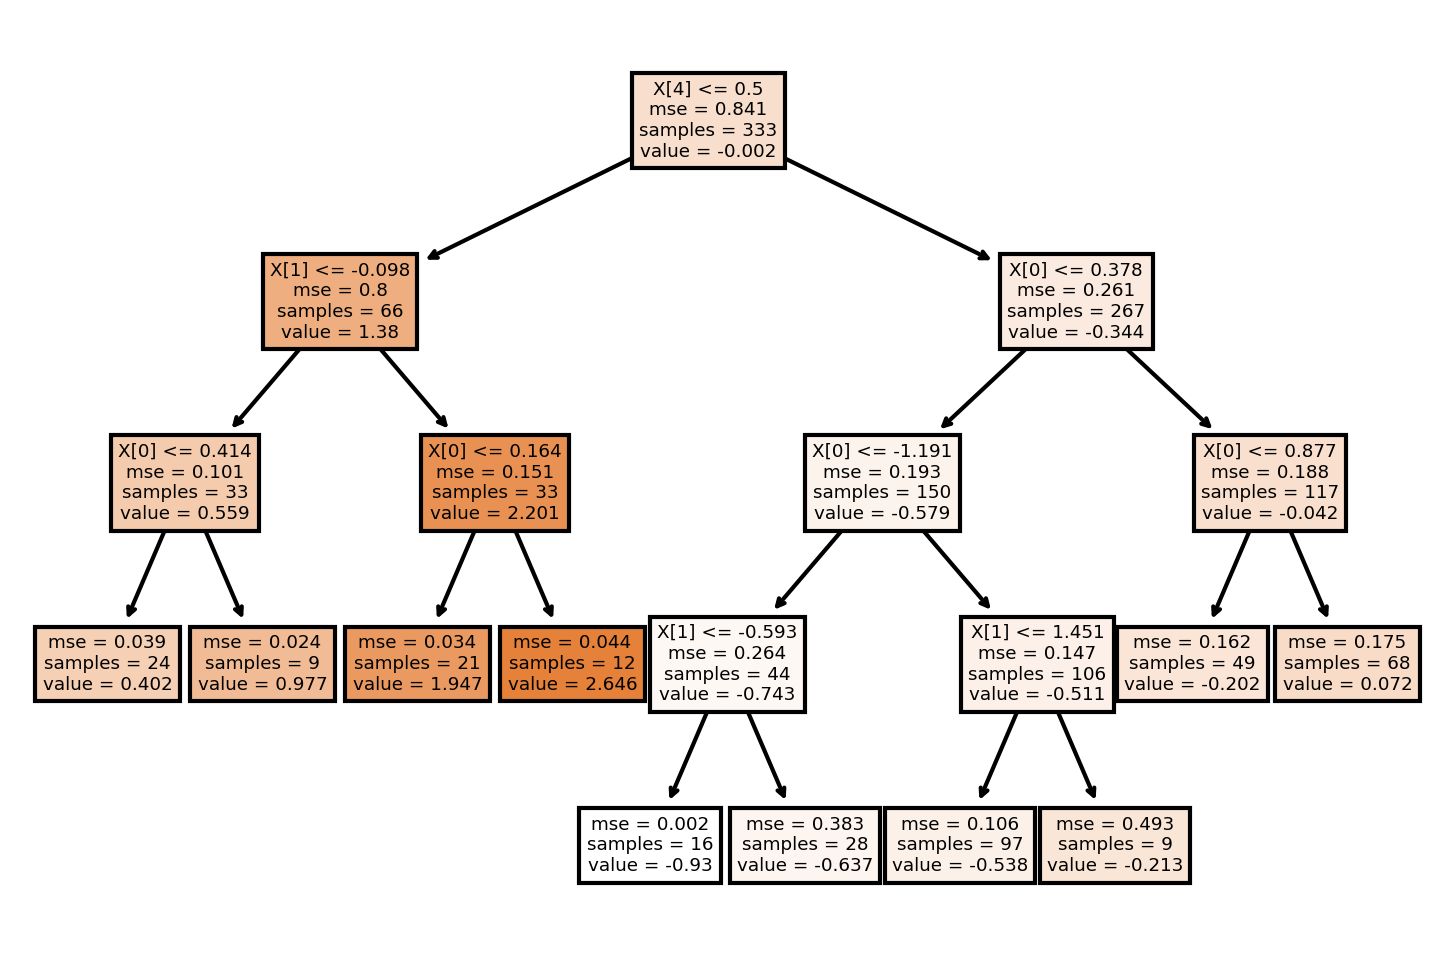

In [56]:
# Setting dpi = 300 to make image clearer than default
from sklearn import tree

fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,filled = True);

#save figure in current directory as png

fig.savefig('regression_decisiontree.png')

In [57]:
MODEL.append('DecisionTreeRegressor')
R_SQUARE.append(dtm.score(X_test1,y_test1))
y_test_predicted = dtm.predict(X_test1)
MSE_VALUES.append(mean_squared_error(y_test_predicted,y_test1))


In [58]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Ridge

In [59]:
myRidge=Ridge(alpha=1).fit(X_train1,y_train1)
prediction=myRidge.predict(X_test1)
mean_squared_error(y_test1,prediction)

0.26323118131230494

In [60]:
mean_squared_error(y_test1,prediction)

0.26323118131230494

In [61]:
myRidge=Ridge(alpha=1).fit(X_train1,y_train1)
print("R-square of the entire data:",myRidge.score(X_test1,y_test1))

R-square of the entire data: 0.6868219667724504


In [62]:
myRidge=Ridge(alpha=0.1).fit(X_train1,y_train1)
print("R-square of the entire data:",myRidge.score(X_test1,y_test1))

R-square of the entire data: 0.6864681483637696


In [63]:
myRidge=Ridge(alpha=0.01).fit(X_train1,y_train1)
print("R-square of the entire data:",myRidge.score(X_test1,y_test1))

R-square of the entire data: 0.6864326072823141


In [64]:
myRidge=Ridge(alpha=0.001).fit(X_train1,y_train1)
print("R-square of the entire data:",myRidge.score(X_test1,y_test1))

R-square of the entire data: 0.6864290503150516


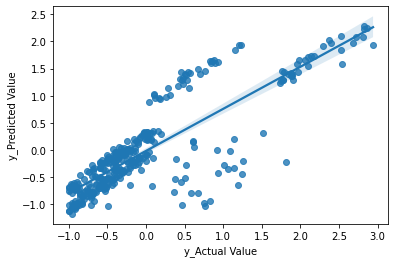

In [65]:
sns.regplot(x=y_test1,y=prediction)
plt.xlabel("y_Actual Value")
plt.ylabel("y_Predicted Value")
plt.show()

In [66]:
MODEL.append('Ridge')
R_SQUARE.append(myRidge.score(X_test1,y_test1))
prediction = dtm.predict(X_test1)
MSE_VALUES.append(mean_squared_error(y_test1,prediction))


## Lasso

In [67]:
myLasso=Lasso(alpha=0.1).fit(X_train1,y_train1)
print("R-square of the train data:",myLasso.score(X_test1,y_test1))

R-square of the train data: 0.647597435159181


In [68]:
prediction2=myLasso.predict(X_test1)

In [69]:
mse_lasso=mean_squared_error(y_test1,prediction2)
r2_lasso=myLasso.score(X_test1,y_test1)
print("MSE of Lasso:",mse_lasso)

MSE of Lasso: 0.296200031926041


In [70]:
myLasso=Lasso(alpha=0.01).fit(X_train1,y_train1)
print("R-square of the train data:",myLasso.score(X_test1,y_test1))

R-square of the train data: 0.6887618821846446


In [71]:
myLasso=Lasso(alpha=0.001).fit(X_train1,y_train1)
print("R-square of the train data:",myLasso.score(X_test1,y_test1))

R-square of the train data: 0.6863877942311636


In [72]:
myLasso=Lasso(alpha=0.0001).fit(X_train1,y_train1)
print("R-square of the train data:",myLasso.score(X_test1,y_test1))

R-square of the train data: 0.6864098128664633


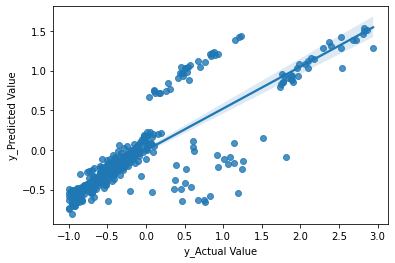

In [73]:
sns.regplot(x=y_test1,y=prediction2)
plt.xlabel("y_Actual Value")
plt.ylabel("y_Predicted Value")
plt.show()

In [74]:
MODEL.append('Lasso')
R_SQUARE.append(myLasso.score(X_test1,y_test1))
prediction2 = dtm.predict(X_test1)
MSE_VALUES.append(mean_squared_error(y_test1,prediction2))


### AdaBoostRegressor

In [75]:
from sklearn.ensemble import AdaBoostRegressor
model_ad = AdaBoostRegressor()

model_ad.fit(X_train1,y_train1)
pred = model_ad.predict(X_test1)

print('Score : %.3f' % (model_ad.score(X_test1,y_test1)))
print('Mean squared Error : %.3f' % (mean_squared_error(y_test1, pred)))

Score : 0.780
Mean squared Error : 0.185


In [76]:
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, cross_val_predict
model1 = AdaBoostRegressor()

cv = KFold(n_splits=10)
n_scores = cross_val_score(model1, X_train1, y_train1, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

y_pred = cross_val_predict(model1, X_test1,y_test1, n_jobs=-1)

print('R-square : %.3f' % (np.mean(n_scores)))
print('Mean squared Error : %.3f' % (mean_squared_error(y_test1, y_pred)))

R-square : 0.824
Mean squared Error : 0.239


In [77]:
MODEL.append('AdaBoostRegressor')
R_SQUARE.append(np.mean(n_scores))
MSE_VALUES.append(mean_squared_error(y_test1, y_pred))

## KNeighborsRegressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
for k in [1,2,3,4,5,6,7,8,9,10,12,14,16]:
    print('K = ',k)
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train1, y_train1)
    y_test_predicted = neigh.predict(X_test1)

    print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))
    print('R-square of the test data : ',neigh.score(X_test1,y_test1))
    print('*'*50)

K =  1
MSE of the test data : 0.2422674455355905
R-square of the test data :  0.7117634706889795
**************************************************
K =  2
MSE of the test data : 0.21137416546819235
R-square of the test data :  0.7485186022171734
**************************************************
K =  3
MSE of the test data : 0.18385800501082225
R-square of the test data :  0.7812558219152791
**************************************************
K =  4
MSE of the test data : 0.1749245249591496
R-square of the test data :  0.7918843868843397
**************************************************
K =  5
MSE of the test data : 0.1706378642066201
R-square of the test data :  0.7969844209186745
**************************************************
K =  6
MSE of the test data : 0.17136945756602204
R-square of the test data :  0.7961140112343902
**************************************************
K =  7
MSE of the test data : 0.16906075618924946
R-square of the test data :  0.7988607776048589
***********

## Stacking

In [79]:
def stacking():

    level0 = list()
    level0.append(('ada', AdaBoostRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor()))

    level1 = LinearRegression()

    model_s= StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model_s

In [80]:
model_s = stacking()
model_s.fit(X_train1,y_train1)


y_pred_stc = model_s.predict(X_test1)

cv = KFold(n_splits=10)
n_scores = cross_val_score(model_s, X_train1, y_train1, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
n_scores1 = cross_val_score(model_s, X_train1, y_train1, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

print('Score: %.3f' % (np.mean(n_scores)))
print('MSE: %.3f' % (np.mean(n_scores1)*-1))

Score: 0.850
MSE: 0.153


In [81]:
MODEL.append('Stacking')
R_SQUARE.append(np.mean(n_scores))
MSE_VALUES.append(np.mean(n_scores1)*-1)

In [82]:
pd.DataFrame({'Model' : MODEL, 'R-Square' : R_SQUARE, 'MSE' : MSE_VALUES})

,Model,R-Square,MSE
0,LinearRegression,0.686429,0.263562
1,RandomForestRegressor,0.833023,0.173905
2,DecisionTreeRegressor,0.829445,0.143354
3,Ridge,0.686429,0.143354
4,Lasso,0.686410,0.143354
5,AdaBoostRegressor,0.823796,0.238634
6,Stacking,0.850183,0.152636


In [83]:
import statsmodels.api as sm
model = sm.OLS(Y,X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     451.5
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        00:57:19   Log-Likelihood:                -954.56
No. Observations:                1332   AIC:                             1929.
Df Residuals:                    1322   BIC:                             1981.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age              0.3003      0.014     21.853      0.000       0.273       0.327
bmi              0.0549      0.050      1.090      0.276      -0.044       0.154
sex_0            0.2475      0.018     13.935      0.000       0.213       0.282
sex_1            0.2328      0.017     13.411      0.000       0.199       0.267
smoker_0        -0.7451      0.016    -45.790      0.000      -0.777      -0.713
smoker_1         1.2255      0.023     52.165      0.000       1.179       1.272
classif_N       -0.0504      0.071     -0.710      0.478      -0.190       0.089
classif_OB1      0.2080      0.034      6.099      0.000       0.141       0.275
classif_OB2      0.2612      0.068      3.851      0.000       0.128       0.394
classif_OB3      0.2036      0.117      1.735      0.083      -0.027       0.434
classif_PREO    -0.0270      0.036     -0.750      0.453      -0.098       0.044
classif_UW      -0.1150      0.144     -0.801      0.423      -0.397       0.167
==============================================================================
Omnibus:                      320.145   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.203
Skew:                           1.281   Prob(JB):                    2.57e-172
Kurtosis:                       5.770   Cond. No.                     1.72e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# RFC

In [84]:
r2_RF=r2_score(y_test1,y_pred)

In [85]:
series_pred = pd.Series(y_pred)

In [86]:
df1 = pd.DataFrame(data=series_pred, columns=['prediction'])
df_1 = pd.merge(df1, y_test1, left_index=True, right_index=True)
df_1.head(10)

,prediction,charges
11,0.006203,1.200000
24,-0.584209,-0.583405
30,-0.191690,1.841952
32,-0.584209,-0.708554
33,0.417357,0.041159
44,2.626505,-0.593660
45,-0.114284,0.607444
49,0.006203,2.099795
50,-0.462752,-0.912995
52,1.018515,0.849965


# Stacking

In [87]:
r2_stack=r2_score(y_test1,y_pred_stc)

In [88]:
series_pred1 = pd.Series(y_pred_stc)

In [89]:
df2 = pd.DataFrame(data=series_pred1, columns=['prediction'])
df_2 = pd.merge(df2, y_test1, left_index=True, right_index=True)
df_2.head(10)

,prediction,charges
11,-0.064625,1.200000
24,-0.594029,-0.583405
30,-0.894310,1.841952
32,-0.574214,-0.708554
33,0.490822,0.041159
44,2.515145,-0.593660
45,-0.324396,0.607444
49,-0.058562,2.099795
50,-0.562402,-0.912995
52,0.674791,0.849965


In [90]:
y_test_predicted

array([ 1.90374048e+00, -5.16906876e-01, -6.46746570e-01, -5.42987539e-01,
       -2.51505134e-01, -7.22804862e-01, -1.09417623e-01, -1.32615381e-01,
       -5.62890858e-01, -5.51219948e-01, -4.80963882e-01, -8.89777033e-02,
       -6.34340704e-01,  1.87808310e-01, -8.00668904e-01,  5.23735252e-01,
       -8.13948406e-01, -8.93406225e-01,  1.80716730e-01, -8.09960240e-01,
       -6.60591821e-01,  2.20188088e+00, -3.36662716e-01,  1.38012351e-01,
       -7.04129225e-01,  1.08506464e+00, -7.32444399e-02,  4.63657278e-01,
       -3.10044073e-01, -2.72521599e-01, -5.81357112e-01, -4.65221995e-01,
       -5.84656971e-01,  4.76306834e-01, -7.51326237e-02, -1.23180135e-01,
        2.01206188e-02,  2.29206216e+00, -5.32414842e-01,  8.98716571e-02,
       -4.97605709e-01, -7.96027593e-01,  1.68324297e+00,  6.20631617e-01,
        2.68756597e+00, -2.22587349e-01, -8.41165937e-01, -6.10932289e-01,
       -3.48808016e-02, -9.05246993e-02, -6.05804160e-01, -7.71805139e-01,
        6.66152024e-01,  

In [91]:
r2_DTC=r2_score(y_test1,y_test_predicted)

In [92]:
series_pred_DTC = pd.Series(y_test_predicted)

In [93]:
df3 = pd.DataFrame(data=series_pred_DTC, columns=['prediction'])
df_3 = pd.merge(df3, y_test1, left_index=True, right_index=True)
df_3.head(10)

,prediction,charges
11,-0.088978,1.200000
24,-0.704129,-0.583405
30,-0.581357,1.841952
32,-0.584657,-0.708554
33,0.476307,0.041159
44,2.687566,-0.593660
45,-0.222587,0.607444
49,-0.090525,2.099795
50,-0.605804,-0.912995
52,0.666152,0.849965
